In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from matplotlib import cm 
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_BTC_J7.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df.head()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000
2019-11-29,0.039930,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179
2019-11-28,-0.009029,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500
2019-11-27,0.043364,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674
2019-11-26,0.010076,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.012396,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020209,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.0075

In [0]:
df.tail()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.099919,-0.023603,0.027486,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.024016,-0.006221,0.03944,0.0,NaN,NaN,NaN,0.067330,0.039268,0.027298,0.0,NaN,NaN,NaN,-0.060034,0.046671,-0.011063,...,-0.04556,0.0,NaN,NaN,NaN,0.009408,0.000000,0.000803,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.072764,0.066792,0.012181,0.0,NaN,NaN,NaN,0.040415,0.039545,0.093129,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2013-01-05,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-0.023603,0.027486,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-0.006221,0.039440,0.00000,NaN,NaN,NaN,NaN,0.039268,0.027298,0.000000,NaN,NaN,NaN,NaN,0.046671,-0.011063,0.000000,...,0.00000,NaN,NaN,NaN,NaN,0.000000,0.000803,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.066792,0.012181,0.000000,NaN,NaN,NaN,NaN,0.039545,0.093129,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2013-01-04,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.027486,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.039440,0.000000,NaN,NaN,NaN,NaN,NaN,0.027298,0.000000,NaN,NaN,NaN,NaN,NaN,-0.011063,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000803,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.012181,0.000000,NaN,NaN,NaN,NaN,NaN,0.093129,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_price = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv', 
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df_price.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
GOLD_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,16589132426,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,16887922522,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,16496129470,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,16634910472,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,16193326033,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [4]:
other_columns = ['BTC_Volume',
                 'BTC_Market_Cap',
                 'Day_Cos',
                 'Day_Sin',
                 'Month_Cos',
                 'Month_Sin',
                 'Quarter_Cos',
                 'Quarter_Sin']

for col in other_columns:
  df[col] = df_price[col]	
	
df.head()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,17158194786,136829391049,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.039930,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,19709695456,140280108521,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,-0.009029,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,19050116751,134879411013,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.043364,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674,23991412764,136102712894,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.010076,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.04

In [5]:
df[['BTC_Close', 'BTC_Intraday', 'NVIDIA_Close_1', 'AMD_Close_1', 'GOOGLE_Close_1', 'GPS_Close_1', 
    'IBM_Close_1', 'GOLD_USD_PM_1', 'EURGBP_Close_1', 'EURHUF_Close_1', 'EURJPY_Close_1', 'EURUSD_Close_1', 
    'CNYUSD_Close_1', 'GBPUSD_Close_1', 'IBB_Close_1', 'ICE_Close_1', 'IEF_Close_1',
    'BTC_Volume',	'BTC_Market_Cap','Day_Cos','Day_Sin','Month_Cos','Month_Sin','Quarter_Cos','Quarter_Sin']].corr()['BTC_Close']

BTC_Close         1.000000
BTC_Intraday     -0.067099
NVIDIA_Close_1    0.009299
AMD_Close_1      -0.016875
GOOGLE_Close_1    0.026085
GPS_Close_1      -0.000368
IBM_Close_1      -0.006759
GOLD_USD_PM_1    -0.013557
EURGBP_Close_1    0.012721
EURHUF_Close_1    0.010199
EURJPY_Close_1    0.021378
EURUSD_Close_1    0.008561
CNYUSD_Close_1   -0.007779
GBPUSD_Close_1   -0.017749
IBB_Close_1       0.009252
ICE_Close_1       0.008447
IEF_Close_1      -0.026301
BTC_Volume        0.005426
BTC_Market_Cap    0.012222
Day_Cos           0.030226
Day_Sin           0.012233
Month_Cos         0.002851
Month_Sin        -0.017543
Quarter_Cos       0.017303
Quarter_Sin      -0.014643
Name: BTC_Close, dtype: float64

In [6]:
df[df.columns].corr()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
BTC_Close,1.000000,-0.067099,0.001239,-0.017905,0.010288,0.026672,0.053548,0.059351,-0.008754,0.009299,-0.004828,-0.017985,-0.000921,0.012118,-0.018650,-0.016811,-0.016875,-0.011499,-0.003470,-0.003244,-0.009624,-0.020991,-0.002876,0.026085,-0.025590,0.014221,-0.002435,-0.005587,-0.002515,-0.012690,-0.000368,0.018331,0.010153,-0.000669,0.019723,0.012657,-0.014178,-0.006759,-0.000249,-0.004823,...,0.007082,0.008839,-0.015296,0.002310,-0.017749,0.038671,-0.033985,0.025013,0.029034,0.026063,0.010217,0.009252,-0.023337,0.027814,0.020710,0.002912,-0.008978,-0.017681,0.008447,-0.025009,0.028295,-0.008942,0.004075,-0.013992,0.004121,-0.026301,0.014382,-0.004877,0.030922,-0.004884,-0.034523,-0.010847,0.005426,0.012222,0.030226,0.012233,0.002851,-0.017543,0.017303,-0.014643
BTC_Intraday,-0.067099,1.000000,-0.022088,0.010667,0.053518,0.017466,0.025503,0.032657,0.020568,-0.016179,-0.017749,0.001200,0.006593,-0.019051,0.014015,-0.018327,-0.029198,-0.008639,-0.009667,-0.013447,-0.041017,-0.011671,-0.022331,-0.017432,-0.002301,0.007890,0.025303,-0.025543,0.027111,0.028135,0.013063,0.022221,-0.000130,-0.002712,-0.002578,-0.018682,-0.014745,-0.006137,-0.013120,0.004239,...,0.001677,-0.005053,-0.009408,-0.014731,0.028907,-0.053623,-0.017691,0.033979,-0.009748,-0.026281,-0.035030,-0.010051,0.034343,0.005545,0.007060,-0.023846,0.006266,0.005572,-0.028779,-0.010482,-0.017641,-0.021685,-0.030381,-0.025253,-0.010776,-0.019960,-0.009099,-0.016867,-0.017776,-0.010428,-0.006406,-0.006234,0.143921,0.152801,-0.054330,0.004691,0.109141,-0.007559,0.098512,0.030259
BTC_Close_1,0.001239,-0.022088,1.000000,0.001468,-0.017977,0.010541,0.026721,0.053624,0.059069,0.013126,0.009262,-0.004846,-0.017989,-0.000986,0.012226,-0.018669,0.000541,-0.016929,-0.011535,-0.003477,-0.003334,-0.009617,-0.021029,-0.010163,0.026047,-0.025601,0.014211,-0.002417,-0.005551,-0.002525,-0.030902,-0.000434,0.018324,0.010126,-0.000706,0.019761,0.012649,0.010141,-0.006735,-0.000254,...,0.016968,0.007083,0.008839,-0.015298,0.048574,-0.017752,0.038683,-0.033993,0.025021,0.029043,0.026072,-0.000879,0.009245,-0.023347,0.027849,0.020714,0.003037,-0.008987,-0.001779,0.008443,-0.025025,0.028272,-0.008954,0.004069,-0.014006,-0.045529,-0.026312,0.014380,-0.005046,0.031042,-0.004862,-0.034536,0.011724,0.013610,0.009768,0.031082,0.003691,-0.018202,0.017669,-0.013747
BTC_Close_2,-0.017905,0.010667,0.001468,1.000000,0.001565,-0.018327,0.010478,0.026628,0.054065,-0.010407,0.013180,0.009288,-0.004843,-0.017902,-0.001133,0.012251,0.006679,0.000612,-0.016886,-0.011530,-0.003357,-0.003346,-0.009572,-0.001714,-0.010108,0.026063,-0.025589,0.014188,-0.002468,-0.005539,0.017705,-0.030815,-0.000422,0.018365,0.010179,-0.000756,0.019776,0.016902,0.010109,-0.006730,...,0.007559,0.016971,0.007084,0.008841,0.043221,0.048608,-0.017767,0.038709,-0.034021,0.025038,0.029063,0.024349,-0.000867,0.009258,-0.023396,0.027851,0.020547,0.003049,0.010102,-0.001772,0.008463,-0.024993,0.028292,-0.008945,0.004088,0.0335

In [7]:
df.describe()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
count,2530.000000,2530.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,1797.000000,1796.000000,1795.000000,1794.000000,1793.000000,1792.000000,1791.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,...,2526.000000,2525.000000,2524.000000,2523.000000,697.000000,696.000000,695.000000,694.000000,693.000000,692.000000,691.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2524.000000,2523.000000,853.000000,852.000000,851.000000,850.000000,849.000000,848.000000,847.000000,2.530000e+03,2.530000e+03,2530.000000,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03
mean,0.002472,0.049534,0.002483,0.002468,0.002473,0.002457,0.002454,0.002449,0.002469,0.006860,0.006865,0.006868,0.006869,0.006879,0.006862,0.006865,0.013111,0.013122,0.013129,0.013130,0.013149,0.013147,0.013154,0.001745,0.001748,0.001749,0.001750,0.001748,0.001745,0.001746,0.002601,0.002609,0.002610,0.002613,0.002618,0.002614,0.002615,0.000842,0.000840,0.000841,...,0.000010,0.000010,0.000010,0.000010,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,0.001535,0.001535,0.001536,0.001534,0.001533,0.001524,0.001525,0.012159,0.012161,0.012166,0.012175,0.012179,0.012181,0.012186,0.000080,0.000080,0.000080,0.000083,0.000081,0.000081,0.000081,3.402759e+09,4.880069e+10,-0.002690,-6.943713e-04,-1.360799e-02,-3.235784e-03,-9.486166e-03,-3.162055e-03
std,0.042018,0.053935,0.042023,0.042025,0.042032,0.042033,0.042041,0.042049,0.042045,0.101453,0.101473,0.101493,0.101513,0.101532,0.101548,0.101568,0.146872,0.146912,0.146952,0.146993,0.147032,0.147073,0.147114,0.049391,0.049400,0.049410,0.049420,0.049429,0.049439,0.049449,0.078284,0.078298,0.078314,0.078329,0.078344,0.078359,0.078375,0.045446,0.045455,0.045464,...,0.011131,0.011133,0.011135,0.011137,0.017394,0.017406,0.017419,0.017431,0.017444,0.017457,0.017469,0.047492,0.047501,0.047510,0.047520,0.047529,0.047536,0.047546,0.230759,0.230805,0.230850,0.230895,0.230941,0.230987,0.231032,0.011372,0.011379,0.011385,0.011392,0.011398,0.011405,0.011412,6.411804e+09,6.496122e+10,0.707781,7.067059e-01,7.036822e-01,7.106554e-01,7.029769e-01,7.114203e-01
min,-0.234604,0.000000,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.234604,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.694856,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.785463,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.353124,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.393754,-0.247626,-0.247626,-0.247626,...,-0.108141,-0.108141,-0.108141,-0.108141,-0.060779,-0.060779,-0.060779,-0.06

In [0]:
df_na = df.ffill()

In [9]:
df_na.head()

,BTC_Close,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,17158194786,136829391049,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.039930,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,19709695456,140280108521,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,-0.009029,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,19050116751,134879411013,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.043364,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674,23991412764,136102712894,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.010076,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.04

In [10]:
data = df_na.iloc[:, 1:]
target = df_na['BTC_Close']
data.head()

,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,IBM_Close_4,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.042715,0.039930,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,-0.007059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,17158194786,136829391049,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.043029,-0.009029,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,0.012282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,19709695456,140280108521,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,0.037027,0.043364,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,19050116751,134879411013,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.092486,0.010076,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.021813,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674,23991412764,136102712894,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.031276,0.014049,-0.047316,0.013843,-0.045276,-0.047963,-0.

In [11]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data.head()

,BTC_Intraday,BTC_Close_1,BTC_Close_2,BTC_Close_3,BTC_Close_4,BTC_Close_5,BTC_Close_6,BTC_Close_7,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,IBM_Close_4,...,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7,BTC_Volume,BTC_Market_Cap,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.126456,0.891489,-0.273706,0.973683,0.181534,0.276244,-1.185020,0.271120,-0.144875,-0.067643,-0.011297,-0.255286,0.414847,-0.067508,-0.067508,0.177361,0.221962,0.297729,0.080576,0.336918,0.221984,0.221984,-0.158895,-0.035378,-0.044013,0.070955,0.142138,-0.035270,-0.035270,-0.259937,-0.033314,-0.108442,-0.145051,0.140223,-0.033320,-0.033320,0.095027,-0.018480,-0.225516,-0.173958,...,-0.000894,-0.000894,-0.000894,-0.000894,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,-0.032319,-0.032319,0.129471,0.008716,0.486120,-0.032035,-0.032035,-0.018823,-0.052678,-0.101306,-0.043964,-0.027263,-0.052684,-0.052684,0.135226,0.135226,-0.189819,0.370919,0.191369,0.135217,0.135217,2.145754,1.355364,0.884883,-1.105540,1.250291,-0.699161,1.4363,0.004446
2019-11-29,-0.120616,-0.274039,0.973754,0.181092,0.276147,-1.185135,0.271490,-1.137189,-0.067613,-0.011297,-0.255309,0.414916,-0.067696,-0.067508,-0.034196,0.221980,0.297729,0.080545,0.336977,0.221936,0.221984,0.156131,-0.035329,-0.044013,0.070958,0.142095,-0.035340,-0.035270,-0.128813,-0.033224,-0.108442,-0.145021,0.140267,-0.033388,-0.033320,0.534302,-0.018525,-0.225516,-0.173875,0.251806,...,-0.000894,-0.000894,-0.000894,-0.000894,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,-0.032319,0.129471,0.008652,0.486104,-0.032239,-0.032035,0.172540,-0.052692,-0.101306,-0.043944,-0.027267,-0.052694,-0.052684,-0.058226,0.135226,-0.189819,0.371046,0.191271,0.135194,0.135217,0.112751,2.543771,1.408494,-0.310652,-1.378828,1.250291,-0.699161,1.4363,0.004446
2019-11-28,-0.231927,0.973226,0.181174,0.275688,-1.185223,0.271354,-1.136429,-1.201198,-0.011266,-0.255309,0.414894,-0.067621,-0.067696,-0.034196,-0.114203,0.297748,0.080545,0.336945,0.221993,0.221936,0.156131,-0.028610,-0.043964,0.070958,0.142099,-0.035382,-0.035340,-0.128813,-0.061695,-0.108351,-0.145021,0.140296,-0.033344,-0.033388,0.534302,-0.088268,-0.225560,-0.173875,0.251885,-0.018562,...,-0.000894,-0.000894,-0.000894,-0.000894,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,0.129471,0.008652,0.486039,-0.032255,-0.032239,0.172540,0.030814,-0.101320,-0.043944,-0.027248,-0.052698,-0.052694,-0.058226,-0.079303,-0.189819,0.371046,0.191399,0.135098,0.135194,0.112751,-0.178517,2.440881,1.325341,-1.269398,-0.613091,1.250291,-0.699161,1.4363,0.004446
2019-11-27,0.796535,0.180770,0.275769,-1.185410,0.271258,-1.136544,-1.200420,-0.578271,-0.255278,0.414894,-0.067643,-0.067621,-0.034386,-0.114203,0.083735,0.080563,0.336945,0.221962,0.221993,0.156084,-0.028610,0.169175,0.071007,0.142099,-0.035378,-0.035382,-0.128882,-0.061695,-0.226354,-0.144929,0.140296,-0.033314,-0.033344,0.534231,-0.088268,-0.406718,-0.173919,0.251885,-0.018480,-0.018562,...,-0.000894,-0.000894,-0.000894,-0.000894,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,1.394228,0.008652,0.486039,-0.032319,-0.032255,0.172327,0.030814,0.0

In [0]:
time_window = 100

In [0]:

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
y_train = np.asarray(target)[time_window:]
y_test = target[:time_window]
X_train = np.asarray(data)[time_window:, :]
X_test = np.asarray(data)[:time_window, :]

In [0]:
y_test

Date
2019-11-30   -0.024739
2019-11-29    0.039930
2019-11-28   -0.009029
2019-11-27    0.043364
2019-11-26    0.010076
                ...   
2019-08-27   -0.017840
2019-08-26    0.022884
2019-08-25   -0.002067
2019-08-24   -0.023830
2019-08-23    0.027243
Name: BTC_Close, Length: 100, dtype: float64

In [14]:
ridge_reg = RidgeCV(alphas = [0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [15]:
ridge_reg_train = ridge_reg.predict(X_train)
ridge_reg_test = ridge_reg.predict(X_test)
print(mean_squared_error(ridge_reg_train, y_train))
print(mean_squared_error(ridge_reg_test, y_test))

0.0017006494318313418
0.001078699091866111


In [16]:
df_result = pd.DataFrame()
df_result['BTC_Var_Reel'] = y_test
df_result.head()

,BTC_Var_Reel
Date,
2019-11-30,-0.024739
2019-11-29,0.039930
2019-11-28,-0.009029
2019-11-27,0.043364
2019-11-26,0.010076


In [0]:
df_result['BTC_Var_Pred'] = ridge_reg_test

In [0]:
df_result['BTC_Close_Reel'] = df_price['BTC_Close'][:time_window]

In [0]:
# df_result['BTC_Close_Reel'][0]
df_result['BTC_Close_Pred'] = np.ones(time_window)

In [20]:
for i in range(len(df_result)-1):
  df_result['BTC_Close_Pred'][i] = df_result['BTC_Close_Reel'][i+1] * ((df_result['BTC_Var_Pred'][i])+1)
df_result['BTC_Close_Pred'][time_window-1] = df_result['BTC_Close_Reel'][time_window-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_result.head(15)

,BTC_Var_Reel,BTC_Var_Pred,BTC_Close_Reel,BTC_Close_Pred
Date,,,,
2019-11-30,-0.024739,0.006206,7569,7809.167427
2019-11-29,0.039930,0.005729,7761,7505.752972
2019-11-28,-0.009029,0.004335,7463,7563.648172
2019-11-27,0.043364,-0.000178,7531,7216.715730
2019-11-26,0.010076,0.007182,7218,7197.325095
2019-11-25,0.014049,0.011712,7146,7129.537850
2019-11-24,-0.047316,0.007940,7047,7455.729622
2019-11-23,0.013843,0.006697,7397,7344.860251
2019-11-22,-0.045276,0.010025,7296,7718.611288


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


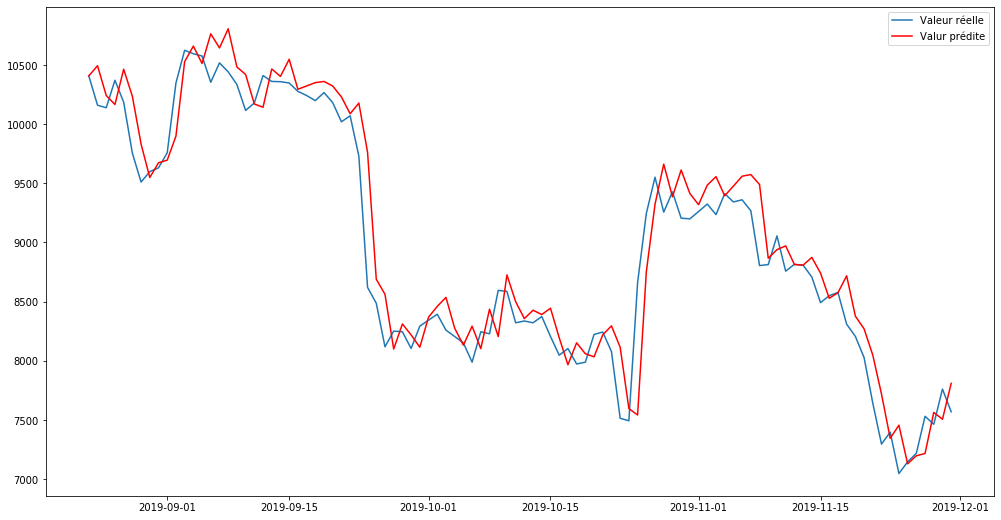

In [22]:
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Close_Reel'], label='Valeur réelle')
plt.plot(df_result.index, df_result['BTC_Close_Pred'], color='r', label='Valur prédite')
plt.legend()
plt.show()

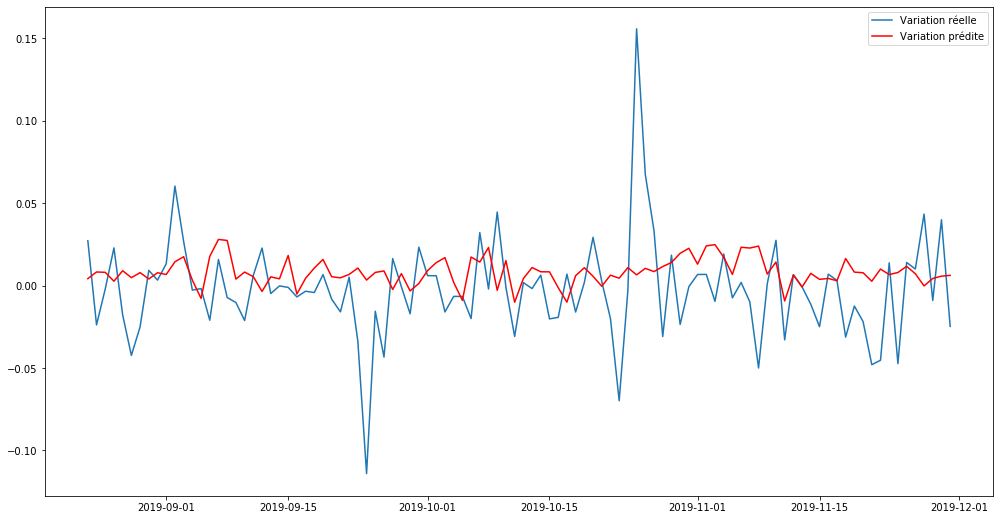

In [23]:
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Var_Reel'], label='Variation réelle')
plt.plot(df_result.index, df_result['BTC_Var_Pred'], color='r', label='Variation prédite')
plt.legend()
plt.show()

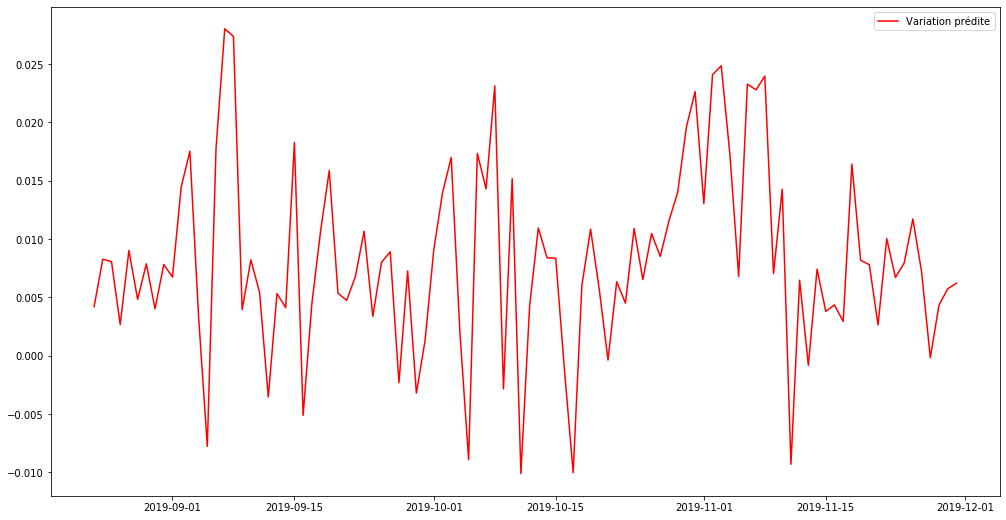

In [24]:
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Var_Pred'], color='r', label='Variation prédite')
plt.legend()
plt.show()